In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('Images')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Type1Haks', 'Type1Pla', 'Type1Range', 'Type1Screw', 'Type1Test', 'Type2Haks', 'Type2Range', 'Type2Screw', 'Type2Test']
Types of classes labels found:  9


In [2]:
import pathlib

data_dir = tf.keras.utils.get_file('Images', origin=dataset_path, untar=True)

data_dir = pathlib.Path(data_dir)

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2440 files belonging to 9 classes.
Using 1952 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2440 files belonging to 9 classes.
Using 488 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Type1Haks', 'Type1Pla', 'Type1Range', 'Type1Screw', 'Type1Test', 'Type2Haks', 'Type2Range', 'Type2Screw', 'Type2Test']


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers.core import Dense
from keras.layers.core import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [27]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(9, activation='softmax'))

In [28]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_12 (Dense)             (None, 9)                 4617      
Total params: 24,641,417
Trainable params: 1,053,705
Non-trainable params: 23,587,712
_________________________________________________________________


In [31]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [32]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
61/61 [==============================] - 131s 2s/step - loss: 0.1488 - accuracy: 0.9472 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2/10
61/61 [==============================] - 118s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/10
61/61 [==============================] - 116s 2s/step - loss: 7.8008e-04 - accuracy: 1.0000 - val_loss: 9.4333e-04 - val_accuracy: 1.0000
Epoch 4/10
61/61 [==============================] - 115s 2s/step - loss: 4.4776e-04 - accuracy: 1.0000 - val_loss: 5.6996e-04 - val_accuracy: 1.0000
Epoch 5/10
61/61 [==============================] - 116s 2s/step - loss: 3.5128e-04 - accuracy: 1.0000 - val_loss: 4.7291e-04 - val_accuracy: 1.0000
Epoch 6/10
61/61 [==============================] - 92s 2s/step - loss: 2.7232e-04 - accuracy: 1.0000 - val_loss: 4.3260e-04 - val_accuracy: 1.0000
Epoch 7/10
61/61 [==============================] - 91s 1s/step - loss: 2.3164e-04 - accuracy: 1.0000 - val_loss: 3.5880e-0

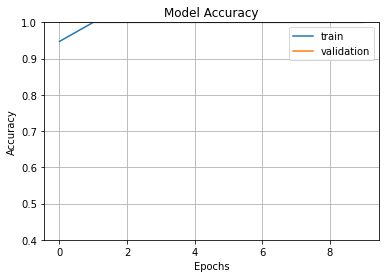

In [33]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

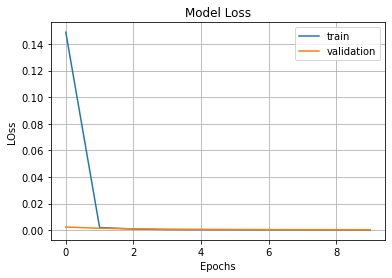

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('LOss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [45]:
import cv2
image=cv2.imread("rang_a_0_6304.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [46]:
print(image.shape)

(1, 180, 180, 3)


In [47]:
pred=resnet_model.predict(image)
print(pred)

[[1.6264931e-09 9.6953966e-07 4.3600148e-06 1.0705968e-07 1.3044882e-09
  2.2726231e-06 9.9999201e-01 1.9641774e-07 3.5298676e-08]]


In [48]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Type2Range
